![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Metaherísticas - Algoritmos Genéticos

### Professor: Felipe Reis


---
### Instruções Iniciais

#### Problemas

Para aprendizado dos Algoritmos Genéticos , iremos estudar os seguinte problema:

* Resolução de uma função matemática comum;
* Maximização de um problema de programação linear;
* Reprodução de uma imagem;

#### Bibliotecas Python

A biblioteca [PyGad](https://pypi.org/project/pygad/) é utilizada para implementação de algoritmos genéticos. Sua documentação pode ser encontrada no link abaixo:
* https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html

#### Referências

O tutorial abaixo foi inspirado nas seguintes links:
* https://blog.paperspace.com/genetic-algorithm-applications-using-pygad/
* https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html

---
### Instalação de bibliotecas 

In [1]:
#instalação biblioteca pygad (algoritmos genéticos)
'''
!pip install pygad
!pip install imageio
!pip install gari
'''

'\n!pip install pygad\n!pip install imageio\n!pip install gari\n'

### Importação de bibliotecas 

In [2]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib        as mpl
%matplotlib inline

import pygad
import tsplib95
import imageio
import gari

---

### Problema 1: Diferença entre strings.

Com base na estrutura abaixo, implemente um algoritmo genético. Imprima as diferenças entre a string original e a string gerada, usando a função *f_diferenca_string*.

**Observações**
* Número de cromossomos à escolha do programador
* Os dois melhores indivíduos devem ser usados para criar a geração seguinte;
* O critério de parada deve ser devido número de máximo de gerações ou caso o erro seja igual a zero.

In [3]:
#sequencia esperada (resultado esperado)
seq_esperada = '010101001110110101010001001011100101010101010101010101100101010101010101010101010101010101'

In [4]:
#imprime as diferenças entre a string original e o string gerada (zero se não houver diferença e 1, se houver)
#parâmetros:
#  - seq_esperada: sequencia original
#  - seq_gerada: sequencia gerada pelo AG
def f_diferenca_string(seq_esperada, seq_gerada):
    diff = ""
    for a, b in zip(seq_esperada, seq_gerada):
        diff += "1" if a != b else "0"
    return diff

In [5]:
num_genes = len(seq_esperada)
num_cromossomos = 50
num_parentes = 2
prob_crossover = 0.3
prob_mutacao = 0.05

#define uma população para uma geracao
#implementar método que possa ser utilizado para geração inicial e gerações seguintes
#parâmetros:
#  - v1: indivíduo 1 (None, caso geração 1)
#  - v2: indivíduo 2 (None, caso geração 1)
def f_pop_geracao(v1, v2):
    individuos = []
    
    #geracao inicial
    if(v1 == None and v2 == None):
        for i in range(0, num_cromossomos):
            individuo = np.random.randint(0, 2, num_genes)
            indiv_str = "".join(str(i) for i in individuo) #convert individuo para string
            individuos.append(indiv_str)
          
    #geracoes seguintes
    else: 
        #mantém os indivíduos originais
        individuos.append(v1)
        individuos.append(v2)
        
        for i in range(0, num_cromossomos-2):
            individuo = f_mutacao((v1 if i % 2 == 0 else v2), 0.5)
            individuos.append(individuo)
    
    #verifica se o número de indivíduos é igual ao número de cromossomos
    assert(len(individuos) == num_cromossomos), "Tamanho individuos:{}".format(len(individuos))
    
    return individuos

#implementação da função de fitness de um individuo
#parâmetros:
#  - solucao: solução gerada por um indivíduo (sequencia de bits)
def f_fitness(solucao):    
    fitness = sum(-1 for a, b in zip(seq_esperada, solucao) if a != b)
    return fitness
    
#implementação da função de crossover 
#implementar um crossover de 1 ponto
#parâmetros:
#  - v1: indivíduo 1
#  - v2: indivíduo 2
#  - prob: probabilidade de crossover
def f_crossover(v1, v2, prob):
    ponto_corte = int(num_genes / 2)
    
    if(np.random.rand() <= prob):
        v3 = v1[:ponto_corte] + v2[ponto_corte:]
        v4 = v2[:ponto_corte] + v1[ponto_corte:]
    else:
        v3 = v1
        v4 = v2
    
    #verifica se tamanhos dos indivíduos é igual ao número de genes
    assert(len(v3) == num_genes and len(v4) == num_genes), "Num genes crossoover: {} {}".format(len(v3), len(v4))
    
    return v3, v4

#implementação da função de mutação 
#parâmetros:
#  - v1: indivíduo
#  - prob: probabilidade de mutação (mutar n bits aleatórios)
def f_mutacao(v1, prob):
    for i in range(0, len(v1)):
        if(np.random.rand() <= prob):
            mut = ('0' if v1[i] == '1' else '1')
            v1 = v1[:i] + mut + v1[i+1:]
    
    #verifica se tamanhos dos indivíduos é igual ao número de genes
    assert(len(v1) == num_genes), "Num genes mutacao: {}".format(len(v1))
    
    return v1

#código principal do algoritmo
#retorno:
#  - best: melhor individuo (tupla com 2 elementos (sequencia_gerada, fitness))
#  - hist_fit: histórico de fitness de cada iteração (melhor elemento)
def main():
    it, min_err_fit = 0, -10e10
    best_parents, hist_fit = [], []
    max_iteracoes = 1000
    
    #inicializa como tupla de melhores pais (seq_gerada, fitness)
    for i in range(0, num_parentes):
        best_parents.append((None, min_err_fit))
    
    ### [ALGORITMO] 1. gerar uma população aleatória
    individuos = f_pop_geracao(v1=None, v2=None)
    
    ### [ALGORITMO] 2. validar critério de término
    while(it <= max_iteracoes and min_err_fit < 0):
        
        ### [ALGORITMO] 3. determinar a aptidão de cada cromossomo
        for ind in individuos:
            fit = f_fitness(ind)
            
            #verifica melhores individuos
            for i in range(0, num_parentes):
                if(fit > best_parents[i][1]): #se o erro do atual estiver mais prox de zero, atualiza 
                    best_parents.insert(i, (ind, fit)) #insere no começo - empurra o erro antigo 1 casa para frente
                    break
        
        ### [ALGORITMO] 4. selecionar os 2 melhores indivíduos
        best_parents = best_parents[:num_parentes] #mantém apenas os n melhores pais (remove piores erros)
        min_err_fit = best_parents[0][1] #atualiza critério de parada
        hist_fit.append(min_err_fit) #histórico de fitness do melhor elemento
        
        ### [ALGORITMO] 5. aplicar crossover e mutações para cromossomos selecionados
        cross1, cross2 = f_crossover(best_parents[0][0], best_parents[1][0], prob_crossover)
        muta1 = f_mutacao(cross1, prob_mutacao)
        muta2 = f_mutacao(cross2, prob_mutacao)
        
        ### [ALGORITMO] 6. gerar próxima geração
        individuos = f_pop_geracao(v1=muta1, v2=muta2)
        
        ### [ALGORITMO] 7. volta ao passo 2
        it+=1 #incrementa o contador antes de voltar ao passo 2
        
    #retona o melhor indivíduo e histório de fitness
    return best_parents[0], hist_fit

In [6]:
best, hist_fit = main()
print(seq_esperada)
print(best)

010101001110110101010001001011100101010101010101010101100101010101010101010101010101010101
('010101001110110101010001001011100101010101010101010101100101010101010101010101010101010101', 0)


In [7]:
diff = f_diferenca_string(seq_esperada, best[0])
print(diff)

000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


#### Impressão de Resultados

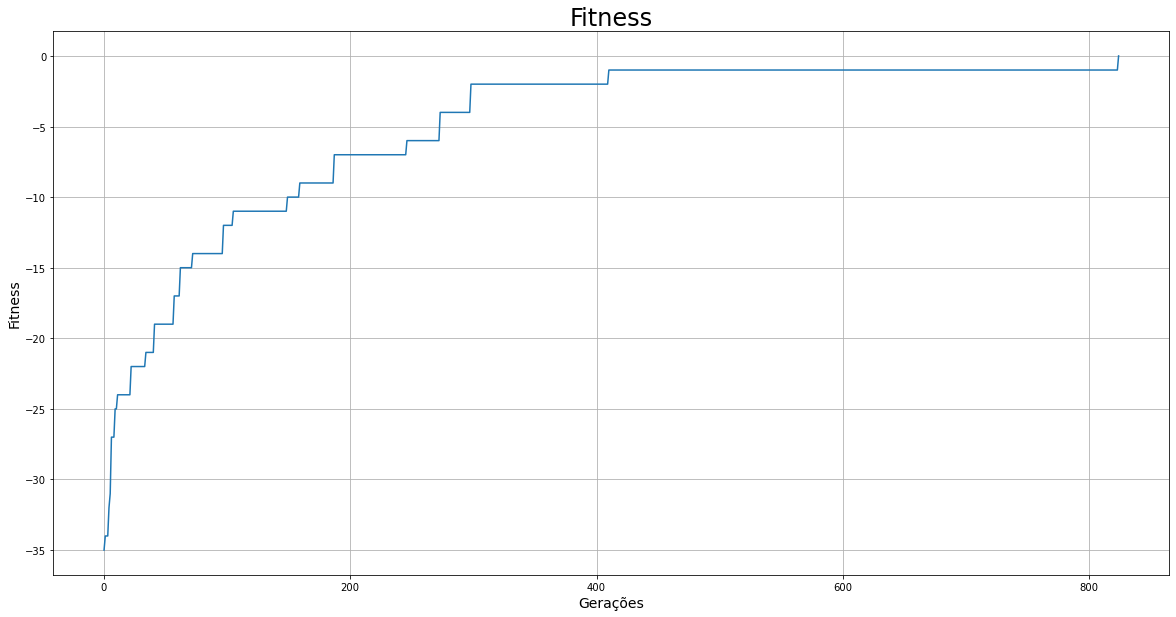

In [8]:
#função de disponibilidade
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 24

interv = np.arange(0, len(hist_fit))
plt.plot(interv, hist_fit)

plt.title('Fitness')
plt.xlabel('Gerações')
plt.ylabel('Fitness')
plt.grid(); 
plt.show()

---

### Problema 2: Solução de uma Função Linear

A função linear será resolvida usando um Algoritmo Genético (AG).

Suponha uma função que receba um número $n$ de parâmetros e retorne a soma entre eles. A função de $f(x)$ é dada por:

$$f(x) = x_1 + x_2 + x_3 + ... + x_n$$

O objetivo desse exercício é fazer com que a soma gerada pelo AG tenha o mesmo valor do somatório.
Para isso, a função de fitness irá comparar o valor gerado pelo AG em relação ao resultado esperado.

Para isso, é possível definir, entre várias formas, dois métodos de cálculo do valor fitness.
* fitness = 1/(erro absoluto)
* fitness = - (erro absoluto)

No primeiro modo, o valor de fitness aumentará até o infinito. Quanto maior o valor, menor o erro e mais próximo da soma estaremos.

No segundo modo, o valor de fitness é negativo e diminuirá até chegar próximo a zero (zero indica que não há erro entre o valor esperado e o valor gerado pelo AG).

Por padrão, iremos utilizar o segundo modo, uma vez que é mais fácil comparar se um valor está próximo ou não a zero.

In [9]:
#define o número de genes e cromossomos
num_genes = 10
num_cromossomos = 100

#define lista de n valores de entrada
val_entrada = np.random.randint(0, 10, num_genes)
print(val_entrada)

#define a saída esperada, dada pelo somatório das entradas
saida_esperada = np.sum(val_entrada)
print(saida_esperada)

[6 2 8 4 9 8 3 1 0 1]
42


In [33]:
def f_on_fitness(ga_instance, population_fitness):
    pop_abs = np.abs(population_fitness) #transforma o valor negativo em positivo
    min1, min2, *_ = np.partition(pop_abs, 1) #obtém os 2 menores valores
    #print(min1, min2) #imprime os dois melhores valores absolutos de fitness em uma geração

def f_fitness(solution, solution_idx):
    output = np.sum(solution)
    fitness = - np.abs(output - saida_esperada)
    return fitness

#define parâmetros do algoritmo genético
ga = pygad.GA(fitness_func = f_fitness, #função de fitness
                num_genes = num_genes, #número de genes
                sol_per_pop = num_cromossomos, #número de cromossomos
                num_generations = 100, #número de gerações 
                num_parents_mating = int(num_cromossomos * .2), #num. soluções selecionadas
              
                mutation_probability = .1, #probabilidade de mutação
                crossover_probability = .1, #probabilidade de crossover
              
                init_range_low = -9, #menor valor para variável
                init_range_high = 9, #maior valor para variável
                on_fitness = f_on_fitness #evento para execução de evento fitness
)

#execução do programa
ga.run()

In [34]:
solution, sol_fitness, sol_idx = ga.best_solution()
print('Valor de entrada: \n', val_entrada)
print()
print("Parâmetros da melhor solução:\n", solution)
#print("Valores da solução (de acordo com a entrada):\n", (val_entrada * solution))
print()

print("Solução encontrada: ", np.sum(val_entrada))
print("Solução esperada: ", saida_esperada)
print()

print("Fitness da melhor solução:", sol_fitness)
print("Índice melhor solution:", sol_idx)

Valor de entrada: 
 [6 2 8 4 9 8 3 1 0 1]

Parâmetros da melhor solução:
 [6.00593247e+00 2.01215585e+00 8.00562182e+00 4.00242199e+00
 8.99758451e+00 7.99506400e+00 2.99822141e+00 9.93003960e-01
 6.73239851e-03 1.00839759e+00]

Solução encontrada:  42
Solução esperada:  42

Fitness da melhor solução: -0.05738822752238426
Índice melhor solution: 0


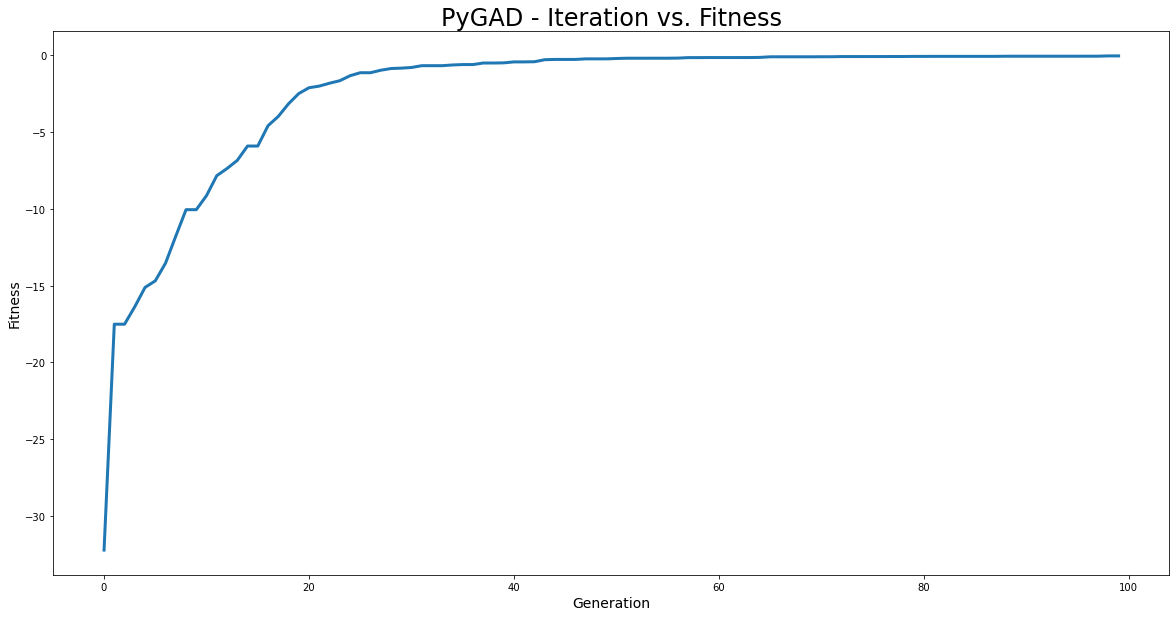

In [35]:
#gráfico de fitness
ga.plot_result()

---
### Problema 3: Solução de uma Função Linear

Suponha o problema de programação linear abaixo.

Nesse problema devemos maximizar a função objetivo $ f(x) = 1 x_1 + 5 x_2 + 4 x_3 $. No entanto, o problema deve respeitar as restrições, dadas pelas inequações $ x_1 < 10 $ e $ x_2 + x_3 <= 15$. Os valores de $ x1, x_2$ e $x_3$ devem ser maiores ou iguais a zero.

Nesta disciplina, não detalharemos o possível significado das variáveis, uma vez que isso não é escopo da disciplina. No entanto, a formulação abaixo pode representar problemas cotidianos, que serão estudados na disciplina de Pesquisa Operacional.

O problema anterior pode ser resumido na forma:

$$ max~z = 1 x_1 + 5 x_2 + 4 x_3 $$
$$ suj. a \qquad\qquad x_1 < 10 $$
$$ \qquad\quad~ x_2 + x_3 <= 15$$
$$ \qquad\quad~ x1, x_2, x_3 >= 0$$

A solução analítico do problema indica que o resultado é igual a 85.

Ao contrário do exemplo anterior, o exemplo atual saberá qual é o resultado esperado. No entanto, deverá maximizar a função.

Para isso, iremos adicionar penalidades à função de fitness. Caso algum indivíduo desrespeite as restrições, iremos adicionar uma penalidade muito grande, de forma que o indivíduo não seja selecionado para a próxima geração.

In [36]:
#define o número de genes e cromossomos
num_genes = 3
num_cromossomos = 100

#define os pesos das variaveis (1 x1 + 5 x2 + 4 x3)
pesos_variaveis = [1, 5, 4]
print(pesos_variaveis)

[1, 5, 4]


In [37]:
def f_on_fitness(ga_instance, population_fitness):
    #print(population_fitness)
    #print(np.min(np.abs(population_fitness)))
    None

def f_fitness(solution, solution_idx):
    penalidade = -10e8
    
    #multiplica os valores de entrada pelos pesos e soma o resultado final (f(x))
    fitness = np.dot(pesos_variaveis, solution)
    
    #restrição 1: caso desrespeitado, adiciona uma penalidade (penalidade valor negativo)
    if(solution[0] >= 10):
        fitness += penalidade
    
    #restrição 2: caso desrespeitado, adiciona uma penalidade (penalidade valor negativo)
    if((solution[1] + solution[2]) > 15):
        fitness += penalidade
    
    #restrição 3: caso desrespeitado, adiciona uma penalidade (penalidade valor negativo)
    for i in range(0,num_genes):
        if(solution[i] < 0):
            fitness += penalidade
    
    #retorna o valor de fitness
    return fitness

#define parâmetros do algoritmo genético
ga = pygad.GA(fitness_func = f_fitness, #função de fitness
                num_genes = num_genes, #número de genes
                sol_per_pop = num_cromossomos, #número de cromossomos
                num_generations = 10000, #número de gerações 
                num_parents_mating = int(num_cromossomos * .2), #num. soluções selecionadas
              
                mutation_probability = .05, #probabilidade de mutação
                crossover_probability = 0.05, #probabilidade de crossover
              
                init_range_low = 0, #menor valor para variável
                init_range_high = 9, #maior valor para variável
                on_fitness = f_on_fitness #evento para execução de evento fitness
)

In [38]:
#execução do programa
ga.run()

sol, _, _ = ga.best_solution()
print("Solução AG: ", np.dot(pesos_variaveis, sol))
print("Solução esperada: 85")
print()

print("Variáveis AG: x1={}, x2={}, x3={}", sol[0], sol[1], sol[2])
print("Variáveis esperadas: x1=10, x2=15, x3=0")

Solução AG:  84.98352252519632
Solução esperada: 85

Variáveis AG: x1={}, x2={}, x3={} 9.999833782001497 14.983895206012408 0.01605317828319408
Variáveis esperadas: x1=10, x2=15, x3=0


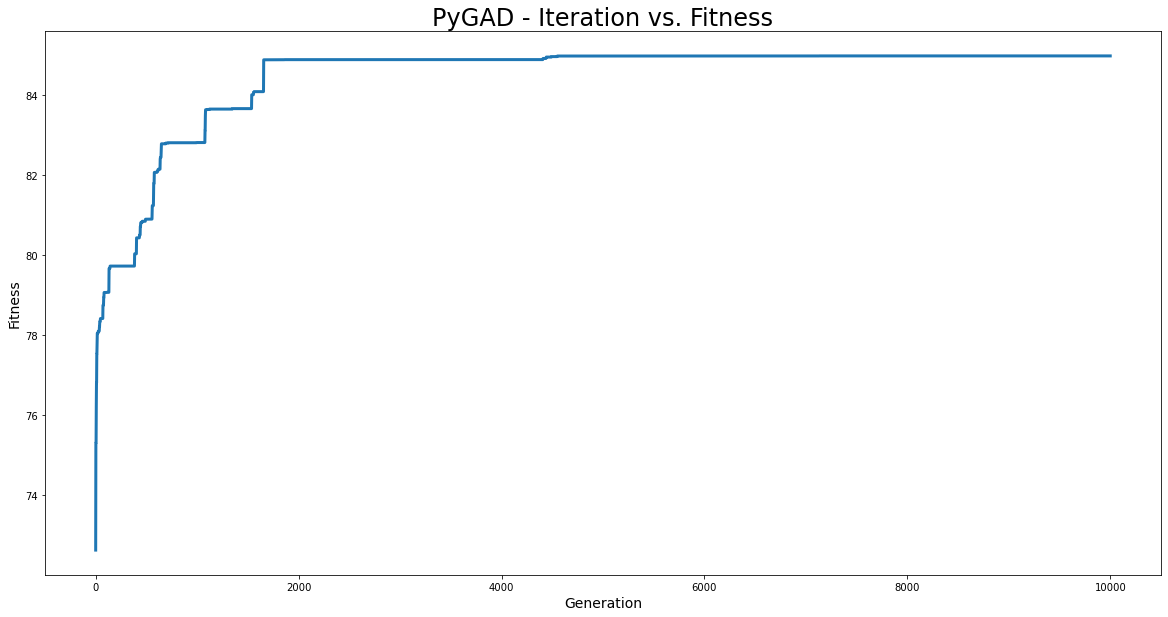

In [39]:
#gráfico de fitness
ga.plot_result()

---
### Problema 4: Reprodução de Imagens

Algoritmos genéticos podem ser utilizados também para reproduzir imagens, apesar dessa técnica não ser muito comum.

Podemos pensar em uma imagem como um conjunto de pixels, com valores que variam entre 0 e 16.777.216 (3 canais de 256 cores).

Outra forma de representar a imagem é normalizar os valores entre 0 e 1. 
Com isso, a imagem seria mais facilmente representada pelo AG.

No exemplo abaixo foi criado um código para a tentativa de reprodução da imagem abaixo.
O AG tentará reproduzir a imagem.

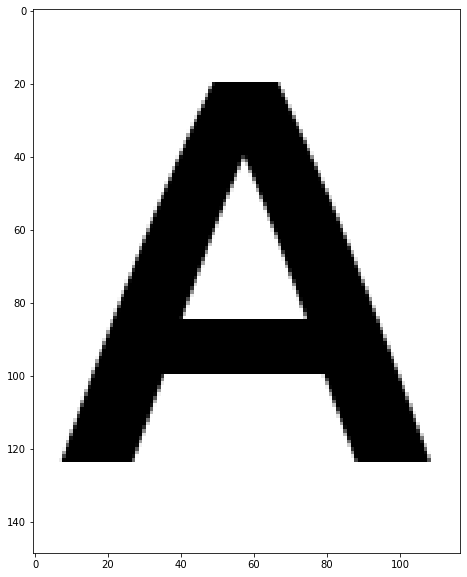

In [19]:
target_im = imageio.imread('imagens/original.png')
target_im = np.asarray(target_im/255, dtype=np.float)

plt.imshow(target_im)
plt.show()

In [20]:
target_chromosome = gari.img2chromosome(target_im)

def fitness_fun(solution, solution_idx):
    fitness = np.sum(np.abs(target_chromosome-solution))

    # Negating the fitness value to make it increasing rather than decreasing.
    fitness = np.sum(target_chromosome) - fitness
    return fitness

In [23]:
def img2chromosome(img_arr):
    return np.reshape(a=img_arr, newshape=(functools.reduce(operator.mul, img_arr.shape)))

def chromosome2img(vector, shape):
    if len(vector) != functools.reduce(operator.mul, shape):
        raise ValueError("Erro no tamanho ({}) e formato do vetor ({}).".format(len(vector), shape))

    return np.reshape(a=vector, newshape=shape)

#### Execução do algoritmo: 5000 gerações

In [24]:
####### ATENÇÃO #########
# O código abaixo poderá levar muitos minutos para ser executado
# Avalie a redução do número de gerações (pouca gerações podem fazer com que o algoritmo não aprenda)
# Para ver o resultado, de acordo com o número de gerações (imagem original), acesse o link abaixo:
# https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
#########################

ga = pygad.GA(num_generations=5000,
                num_parents_mating=20,
                fitness_func=fitness_fun,
                sol_per_pop=100,
                num_genes=target_im.size,
                init_range_low=0.0,
                init_range_high=1.0,
                mutation_percent_genes=0.02,
                mutation_type="random",
                mutation_by_replacement=True,
                crossover_probability = 0.1,        
                random_mutation_min_val=0.0,
                random_mutation_max_val=1.0
)

ga.run()

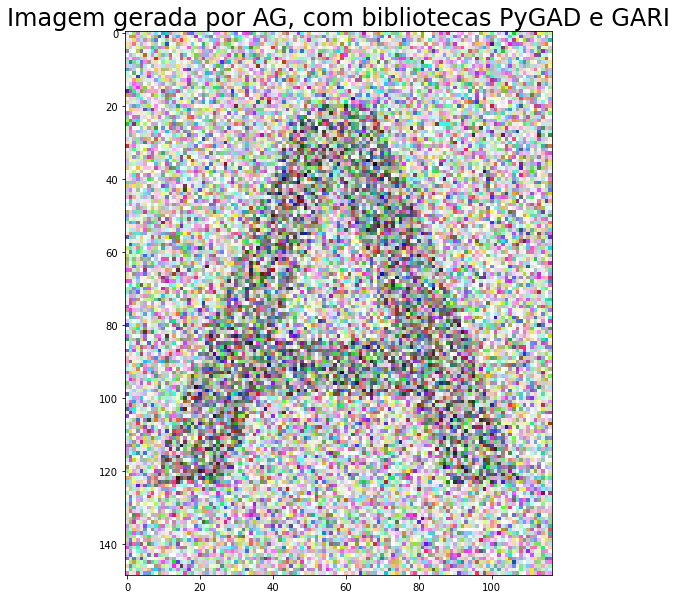

In [25]:
#impressão da imagem gerada pelo AG
solution, _, _ = ga.best_solution()

result = gari.chromosome2img(solution, target_im.shape)
plt.imshow(result)
plt.title("Imagem gerada por AG, com bibliotecas PyGAD e GARI")
plt.show()

#### Execução do algoritmo: 10000 gerações

In [26]:
####### ATENÇÃO #########
# O código abaixo poderá levar muitos minutos para ser executado
# Avalie a redução do número de gerações (pouca gerações podem fazer com que o algoritmo não aprenda)
# Para ver o resultado, de acordo com o número de gerações (imagem original), acesse o link abaixo:
# https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
#########################

ga = pygad.GA(num_generations=10000,
                num_parents_mating=20,
                fitness_func=fitness_fun,
                sol_per_pop=100,
                num_genes=target_im.size,
                init_range_low=0.0,
                init_range_high=1.0,
                mutation_percent_genes=0.02,
                mutation_type="random",
                mutation_by_replacement=True,
                crossover_probability = 0.1,        
                random_mutation_min_val=0.0,
                random_mutation_max_val=1.0
)

ga.run()

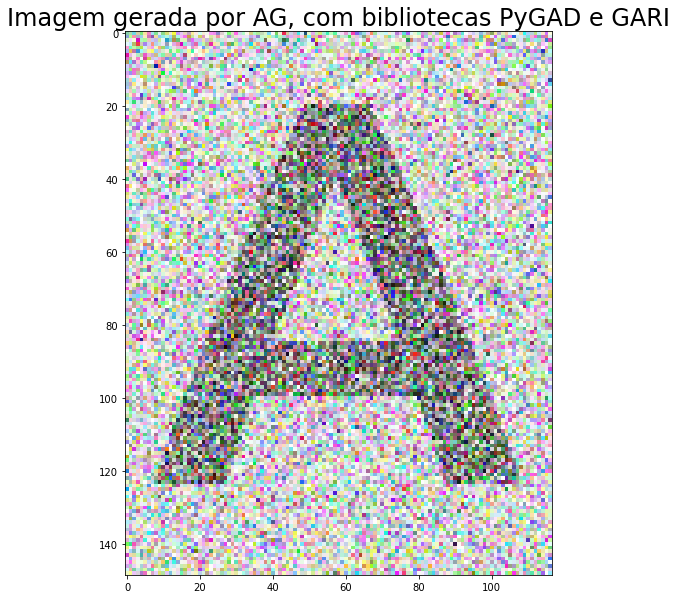

In [27]:
#impressão da imagem gerada pelo AG
solution, _, _ = ga.best_solution()

result = gari.chromosome2img(solution, target_im.shape)
plt.imshow(result)
plt.title("Imagem gerada por AG, com bibliotecas PyGAD e GARI")
plt.show()